## Imports

In [15]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from typing import List

from datasets import load_d4ls

pd.set_option('display.max_columns', None)

## EDA utils

In [35]:
def make_histograms(
        df: DataFrame,
        quant_vars: List[str],
        title: str,
        ) -> None:
    r"""
    Plot histograms of the given quantitative variables in the dataframe.
    """

    num_plots = len(quant_vars)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(14, 4 * num_rows))
    fig.suptitle(title)

    for i, var in enumerate(quant_vars):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        ax.hist(df[var], density=True, bins=100, color='grey', edgecolor='black')
        ax.set_xlabel(var)
        ax.set_ylabel('Probability Density')

    plt.show()

In [ ]:

# def make_boxplots(
#         df: DataFrame,
#         quant_vars: List[str],
#         title: str,
#         ) -> None:
#     r"""
#     Plot boxplots of the given quantitative variables in the dataframe.
#     """

#     fig = sp.make_subplots(rows=(len(quant_vars)+1)//2, cols=2)
#     fig.update_layout(height=1000, width=1200, title=title)

#     for i, var in enumerate(quant_vars):
#         fig.add_trace(go.Box(y=df[var], name=var, showlegend=False), row=i//2+1, col=i%2+1)
#         fig.update_xaxes(title_text=var, row=i//2+1, col=i%2+1)
#         fig.upd

In [13]:


# def make_boxplots(
#         df: DataFrame,
#         quant_vars: List[str],
#         title: str,
#         ) -> None:
#     r"""
#     Plot boxplots of the given quantitative variables in the dataframe.
#     """

#     fig = sp.make_subplots(rows=(len(quant_vars)+1)//2, cols=2)
#     fig.update_layout(height=1000, width=1200, title=title)

#     for i, var in enumerate(quant_vars):
#         fig.add_trace(go.Box(y=df[var], name=var, showlegend=False), row=i//2+1, col=i%2+1)
#         fig.update_xaxes(title_text=var, row=i//2+1, col=i%2+1)
#         fig.update_yaxes(title_text=var, row=i//2+1, col=i%2+1)

#     fig.show()

# def make_qqplots(
#         df: DataFrame,
#         quant_vars: List[str],
#         title: str,
#         ) -> None:
#     r"""
#     Plot QQ-plots of the given quantitative variables in the dataframe.
#     """

#     fig = sp.make_subplots(rows=(len(quant_vars)+1)//2, cols=2)
#     fig.update_layout(height=1000, width=1200, title=title)

#     for i, var in enumerate(quant_vars):
#         stats.probplot(df[var], dist='norm', plot=plt)
#         fig.add_trace(go.Scatter(x=plt.gca().lines[0].get_xdata(), y=plt.gca().lines[0].get_ydata(), mode='lines', name='line', showlegend=False), row=i//2+1, col=i%2+1)
#         fig.add_trace(go.Scatter(x=plt.gca().lines[1].get_xdata(), y=plt.gca().lines[1].get_ydata(), mode='markers', name='data', showlegend=False), row=i//2+1, col=i%2+1)
#         fig.update_xaxes(title_text='theoretical quantiles', row=i//2+1, col=i%2+1)
#         fig.update_yaxes(title_text='sample quantiles', row=i//2+1, col=i%2+1)

#     fig.show()

## Loading anndata

In [7]:
train_anndata = load_d4ls.load_full_anndata()

## Tabular data exploration

### Checking types and missing data

In [8]:
display(train_anndata.obs.columns)
display(train_anndata.obs.dtypes)
display(train_anndata.obs.head())
display(train_anndata.obs.isna().sum())

Index(['image', 'sample_id', 'ObjectNumber', 'Pos_X', 'Pos_Y', 'area',
       'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px',
       'height_px', 'acquisition_id', 'SlideId', 'Study', 'Box.Description',
       'Position', 'SampleId', 'Indication', 'BatchId', 'SubBatchId', 'ROI',
       'ROIonSlide', 'includeImage', 'flag_no_cells', 'flag_no_ROI',
       'flag_total_area', 'flag_percent_covered', 'small_cell', 'celltypes',
       'flag_tumor', 'PD1_pos', 'Ki67_pos', 'cleavedPARP_pos', 'GrzB_pos',
       'tumor_patches', 'distToCells', 'CD20_patches', 'Batch', 'cell_labels'],
      dtype='object')

image                   category
sample_id               category
ObjectNumber             float64
Pos_X                    float64
Pos_Y                    float64
area                     float64
major_axis_length        float64
minor_axis_length        float64
eccentricity             float64
width_px                 float64
height_px                float64
acquisition_id           float64
SlideId                 category
Study                   category
Box.Description         category
Position                   int64
SampleId                category
Indication              category
BatchId                 category
SubBatchId              category
ROI                        int64
ROIonSlide                 int64
includeImage               int64
flag_no_cells              int64
flag_no_ROI                int64
flag_total_area            int64
flag_percent_covered       int64
small_cell                 int64
celltypes               category
flag_tumor                 int64
PD1_pos   

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,acquisition_id,SlideId,Study,Box.Description,Position,SampleId,Indication,BatchId,SubBatchId,ROI,ROIonSlide,includeImage,flag_no_cells,flag_no_ROI,flag_total_area,flag_percent_covered,small_cell,celltypes,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,600.0,2.0,10032145-THOR-VAR-TIS-01-IMC-01,180305_THOR,Slide_IMC-TIS-01,1,10032145-THOR-VAR-TIS-01-PB,THOR,Batch20191023,Batch20191023_01,2,2,1,0,0,0,0,0,MacCD163,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,600.0,2.0,10032145-THOR-VAR-TIS-01-IMC-01,180305_THOR,Slide_IMC-TIS-01,1,10032145-THOR-VAR-TIS-01-PB,THOR,Batch20191023,Batch20191023_01,2,2,1,0,0,0,0,0,Mural,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,600.0,2.0,10032145-THOR-VAR-TIS-01-IMC-01,180305_THOR,Slide_IMC-TIS-01,1,10032145-THOR-VAR-TIS-01-PB,THOR,Batch20191023,Batch20191023_01,2,2,1,0,0,0,0,0,DC,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,600.0,2.0,10032145-THOR-VAR-TIS-01-IMC-01,180305_THOR,Slide_IMC-TIS-01,1,10032145-THOR-VAR-TIS-01-PB,THOR,Batch20191023,Batch20191023_01,2,2,1,0,0,0,0,0,Tumor,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,600.0,2.0,10032145-THOR-VAR-TIS-01-IMC-01,180305_THOR,Slide_IMC-TIS-01,1,10032145-THOR-VAR-TIS-01-PB,THOR,Batch20191023,Batch20191023_01,2,2,1,0,0,0,0,0,Tumor,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor


image                       0
sample_id                   0
ObjectNumber                0
Pos_X                       0
Pos_Y                       0
area                        0
major_axis_length           0
minor_axis_length           0
eccentricity                0
width_px                    0
height_px                   0
acquisition_id              0
SlideId                     0
Study                       0
Box.Description             0
Position                    0
SampleId                    0
Indication                  0
BatchId                     0
SubBatchId                  0
ROI                         0
ROIonSlide                  0
includeImage                0
flag_no_cells               0
flag_no_ROI                 0
flag_total_area             0
flag_percent_covered        0
small_cell                  0
celltypes                   0
flag_tumor                  0
PD1_pos                     0
Ki67_pos                    0
cleavedPARP_pos             0
GrzB_pos  

`train_anndata.var` stores the information about the marker names. Please use the `marker` column in your analysis. `use_channel` indicates wheather a channel is used in practice.

In [9]:
display(train_anndata.var.columns)
display(train_anndata.var.dtypes)
display(train_anndata.var.head())
display(train_anndata.var.isna().sum())

Index(['channel', 'use_channel', 'marker'], dtype='object')

channel        object
use_channel     int64
marker         object
dtype: object

,channel,use_channel,marker
0,Y89,1,MPO
1,In113,0,HistoneH3
2,In115,1,SMA
3,Pr141,1,CD16
4,Nd142,1,CD38


channel        0
use_channel    0
marker         0
dtype: int64

`train_anndata.layers['exprs']` with shape `(train_anndata.obs.shape[0], train_anndata.var.shape[0])` stores the matrix with marker expressions for each cell:

In [10]:
display(train_anndata.layers)
layer_types = [type(layer) for layer in train_anndata.layers.values()]
display(layer_types)
display(train_anndata.layers['counts'].shape)
display(train_anndata.layers['counts'].dtype)
display(train_anndata.layers['exprs'].shape)
display(train_anndata.layers['exprs'].dtype)
display(train_anndata.layers['counts'][0, :])
display(train_anndata.layers['exprs'][0, :])

Layers with keys: counts, exprs

[numpy.ndarray, numpy.ndarray]

(236791, 40)

dtype('float64')

(236791, 40)

dtype('float64')

array([0.00000000e+00, 3.00487801e+00, 5.24085074e-01, 1.63121123e+00,
       5.38077078e-01, 1.39689170e+01, 4.14863152e-01, 4.71328164e-01,
       5.53716363e-01, 9.51141859e+00, 4.82727198e+00, 0.00000000e+00,
       2.71752312e+01, 9.78622061e-01, 1.85967990e-01, 5.45270696e-01,
       2.54381183e+00, 5.10140185e-01, 5.19902128e-01, 4.32341601e-01,
       2.41904620e-01, 2.56278374e-01, 8.55667860e-01, 2.09217334e+00,
       3.67347311e-01, 9.01104312e-02, 3.39458383e-01, 8.31787371e-01,
       1.13483259e+00, 3.10664630e-02, 8.77724513e-01, 5.98150581e-01,
       2.51181416e+00, 6.40469544e+00, 8.58074995e-01, 0.00000000e+00,
       1.79422707e+01, 4.37116955e-01, 5.84347093e+01, 1.00301352e+02])

array([0.        , 1.81998789, 0.50264976, 1.2654101 , 0.51500715,
       3.33126057, 0.40379979, 0.45542107, 0.52873423, 2.94839226,
       2.27798847, 0.        , 3.99579148, 0.86617603, 0.18491241,
       0.52133242, 1.66338067, 0.49026304, 0.49894161, 0.41989374,
       0.23960538, 0.25355285, 0.77554996, 1.48411277, 0.35955019,
       0.08998893, 0.33325552, 0.75729804, 0.97357613, 0.03106147,
       0.79221775, 0.56723839, 1.6516099 , 2.55621816, 0.77737784,
       0.        , 3.58108228, 0.42427316, 4.76113044, 5.30135121])

### Checking values

In [11]:
train_anndata.obs.columns

Index(['image', 'sample_id', 'ObjectNumber', 'Pos_X', 'Pos_Y', 'area',
       'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px',
       'height_px', 'acquisition_id', 'SlideId', 'Study', 'Box.Description',
       'Position', 'SampleId', 'Indication', 'BatchId', 'SubBatchId', 'ROI',
       'ROIonSlide', 'includeImage', 'flag_no_cells', 'flag_no_ROI',
       'flag_total_area', 'flag_percent_covered', 'small_cell', 'celltypes',
       'flag_tumor', 'PD1_pos', 'Ki67_pos', 'cleavedPARP_pos', 'GrzB_pos',
       'tumor_patches', 'distToCells', 'CD20_patches', 'Batch', 'cell_labels'],
      dtype='object')

Train `anndata` `obs` dataframe stores the information about cells. Each row in this table represent an information about a single cell. It has the following columns that are interesting for your analysis:
- `image` - name of the image file from which a cell was obtained,
- `sample_id` - name of the patient sample from which a given image was obtained,
- `ObjectNumber` - a cell number within a given image (note that it starts from 1),
- `Pos_X`, `Pos_Y` - a spatial position of the cell one the image,
- `area`, `major_axis_length`, `minor_axis_length`, `eccentricity`, `width_px`, `height_px` - shape-derived features of a cell,
- `Batch` - a batch in which a sample was used,
- `cell_labels` - your target cell type annotations. **THIS IS WHAT YOUR MODELS AIM TO PREDICT!**

### Cell class distribution

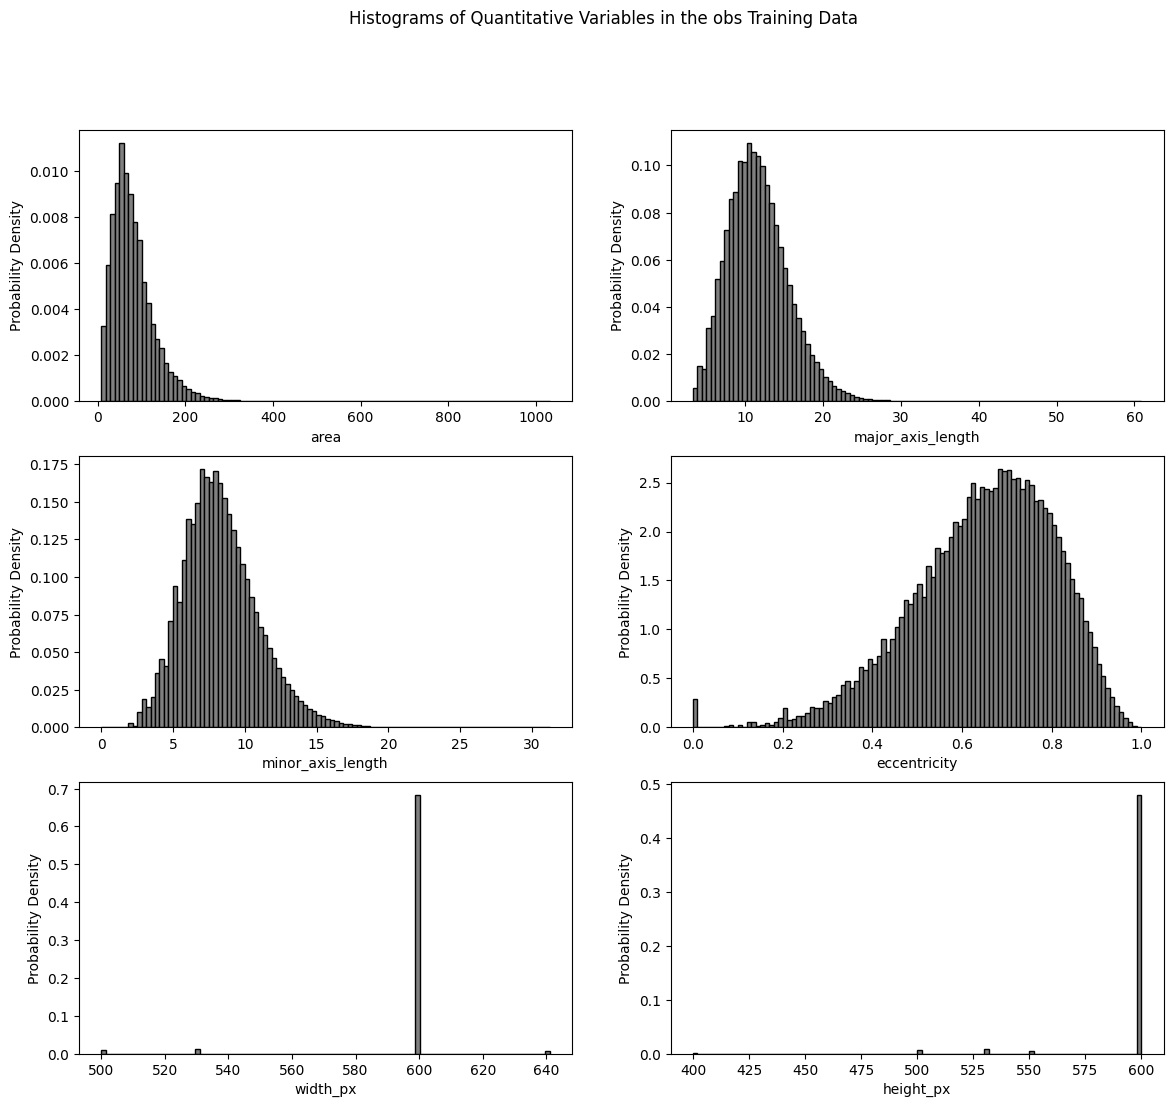

In [36]:
obs_quant_vars = ['area', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px', 'height_px']
train_anndata.obs[obs_quant_vars].describe()
make_histograms(train_anndata.obs, obs_quant_vars, 'Histograms of Quantitative Variables in the obs Training Data')